
# Project: Investigate a Dataset - [No-Show Medical Appointments - Brasil - 2016]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
<ul>
<li>PatientId          --> it is a unique number per each patient.</li>
<li>AppointmentID      --> it is a unique number per each appointment.</li>
<li>Gender             --> Patient's gender.</li>
<li>ScheduledDay       --> tells us on what day the patient set up their appointment.</li>
<li>AppointmentDay --> tells us on what day the patient should attend their appointment.</li>
<li>Age --> Patient's age.</li>
<li>Neighbourhood --> indicates the location of the hospital - not the paitent.</li>
<li>Scholarship -->  indicates whether or not the patient is enrolled in Brasilian welfare program.</li>
<li>Hipertension</li>
<li>Diabetes</li>
<li>Alcoholism</li>
<li>Handcap</li>
<li>SMS_received --> indicate if the paitent has recevied a reminder sms before this appointment or not</li>
<li>No-show --> Be careful about the encoding it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up. </li>
</ul>


### Questions for Analysis
<ul> 
    <li>What is the dataset age distribution and attendance distribution?</li>
    <li>What is the effect of having a scholarship on the attendance rate?</li>
    <li>Is there any coloration between the gender and the attendance?</li>
    <li>What is the distribution of scholarships between the two gender?</li>
    <li>Does sending a confirmation SMS could increase the attendance rate?</li>



</ul>



<a id='wrangling'></a>
## Data Wrangling

- Loading the data and investigating it to determine the required cleanning process

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
%matplotlib inline

In [2]:
#loading the dataset
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


## Datatype checking:
 <ul><li> All IDs should be string as no mathematical operations will be performed on them</li>
    <li>Scheduled Day and appointment day: we need to replace the t that is seprating the date and the time and convert it to date-time type</li>
    </ul>
    
To avoid any mis-understanding and make claculations more easy I will replace No-show column to be attendance and the values to be 0 for not attending / 1 for attending 

In [5]:
df.columns= df.columns.str.lower()
df

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [6]:
df['patientid'] = df['patientid'].astype(str)
df['appointmentid'] = df['appointmentid'].astype(str)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   patientid       110527 non-null  object
 1   appointmentid   110527 non-null  object
 2   gender          110527 non-null  object
 3   scheduledday    110527 non-null  object
 4   appointmentday  110527 non-null  object
 5   age             110527 non-null  int64 
 6   neighbourhood   110527 non-null  object
 7   scholarship     110527 non-null  int64 
 8   hipertension    110527 non-null  int64 
 9   diabetes        110527 non-null  int64 
 10  alcoholism      110527 non-null  int64 
 11  handcap         110527 non-null  int64 
 12  sms_received    110527 non-null  int64 
 13  no-show         110527 non-null  object
dtypes: int64(7), object(7)
memory usage: 11.8+ MB


In [8]:
df.rename(columns={'no-show':'attendance'},inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   patientid       110527 non-null  object
 1   appointmentid   110527 non-null  object
 2   gender          110527 non-null  object
 3   scheduledday    110527 non-null  object
 4   appointmentday  110527 non-null  object
 5   age             110527 non-null  int64 
 6   neighbourhood   110527 non-null  object
 7   scholarship     110527 non-null  int64 
 8   hipertension    110527 non-null  int64 
 9   diabetes        110527 non-null  int64 
 10  alcoholism      110527 non-null  int64 
 11  handcap         110527 non-null  int64 
 12  sms_received    110527 non-null  int64 
 13  attendance      110527 non-null  object
dtypes: int64(7), object(7)
memory usage: 11.8+ MB


In [10]:
df['attendance'] = df['attendance'].replace('No','attended')
df['attendance'] = df['attendance'].replace('Yes','not-attended')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   patientid       110527 non-null  object
 1   appointmentid   110527 non-null  object
 2   gender          110527 non-null  object
 3   scheduledday    110527 non-null  object
 4   appointmentday  110527 non-null  object
 5   age             110527 non-null  int64 
 6   neighbourhood   110527 non-null  object
 7   scholarship     110527 non-null  int64 
 8   hipertension    110527 non-null  int64 
 9   diabetes        110527 non-null  int64 
 10  alcoholism      110527 non-null  int64 
 11  handcap         110527 non-null  int64 
 12  sms_received    110527 non-null  int64 
 13  attendance      110527 non-null  object
dtypes: int64(7), object(7)
memory usage: 11.8+ MB


In [11]:
df['scheduledday']= pd.to_datetime(df['scheduledday'])
df['appointmentday']= pd.to_datetime(df['appointmentday'])


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   patientid       110527 non-null  object             
 1   appointmentid   110527 non-null  object             
 2   gender          110527 non-null  object             
 3   scheduledday    110527 non-null  datetime64[ns, UTC]
 4   appointmentday  110527 non-null  datetime64[ns, UTC]
 5   age             110527 non-null  int64              
 6   neighbourhood   110527 non-null  object             
 7   scholarship     110527 non-null  int64              
 8   hipertension    110527 non-null  int64              
 9   diabetes        110527 non-null  int64              
 10  alcoholism      110527 non-null  int64              
 11  handcap         110527 non-null  int64              
 12  sms_received    110527 non-null  int64              
 13  attendance    

## Adding  a new column
this column calculate the gap between scheduling and appointment date

In [13]:
df['gap_between_scheduled_appointment'] = (df['appointmentday']-df['scheduledday']).dt.days

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype              
---  ------                             --------------   -----              
 0   patientid                          110527 non-null  object             
 1   appointmentid                      110527 non-null  object             
 2   gender                             110527 non-null  object             
 3   scheduledday                       110527 non-null  datetime64[ns, UTC]
 4   appointmentday                     110527 non-null  datetime64[ns, UTC]
 5   age                                110527 non-null  int64              
 6   neighbourhood                      110527 non-null  object             
 7   scholarship                        110527 non-null  int64              
 8   hipertension                       110527 non-null  int64              
 9   diabetes                           11

# Note:
This Step I saw it on someone report on Github and I thought it is very nessesary to be included


In [14]:
print(df['age'].unique())
print(df['age'].min())
print(df['age'].max())

[ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]
-1
115


It seems that there are outlayers:
    - ages more than 99 
    - ages less than 0 (may be he/she is a newborn baby) 
    

In [15]:
df= df[(df['age']<100) & (df['age']>= 0) ]

In [16]:
df['age'].unique()

array([62, 56,  8, 76, 23, 39, 21, 19, 30, 29, 22, 28, 54, 15, 50, 40, 46,
        4, 13, 65, 45, 51, 32, 12, 61, 38, 79, 18, 63, 64, 85, 59, 55, 71,
       49, 78, 31, 58, 27,  6,  2, 11,  7,  0,  3,  1, 69, 68, 60, 67, 36,
       10, 35, 20, 26, 34, 33, 16, 42,  5, 47, 17, 41, 44, 37, 24, 66, 77,
       81, 70, 53, 75, 73, 52, 74, 43, 89, 57, 14,  9, 48, 83, 72, 25, 80,
       87, 88, 84, 82, 90, 94, 86, 91, 98, 92, 96, 93, 95, 97, 99],
      dtype=int64)

In [17]:
df['age'].describe()

count    110515.000000
mean         37.082242
std          23.100482
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max          99.000000
Name: age, dtype: float64

<a id='eda'></a>
# Exploratory Data Analysis

## Histogram represents the dataset factors

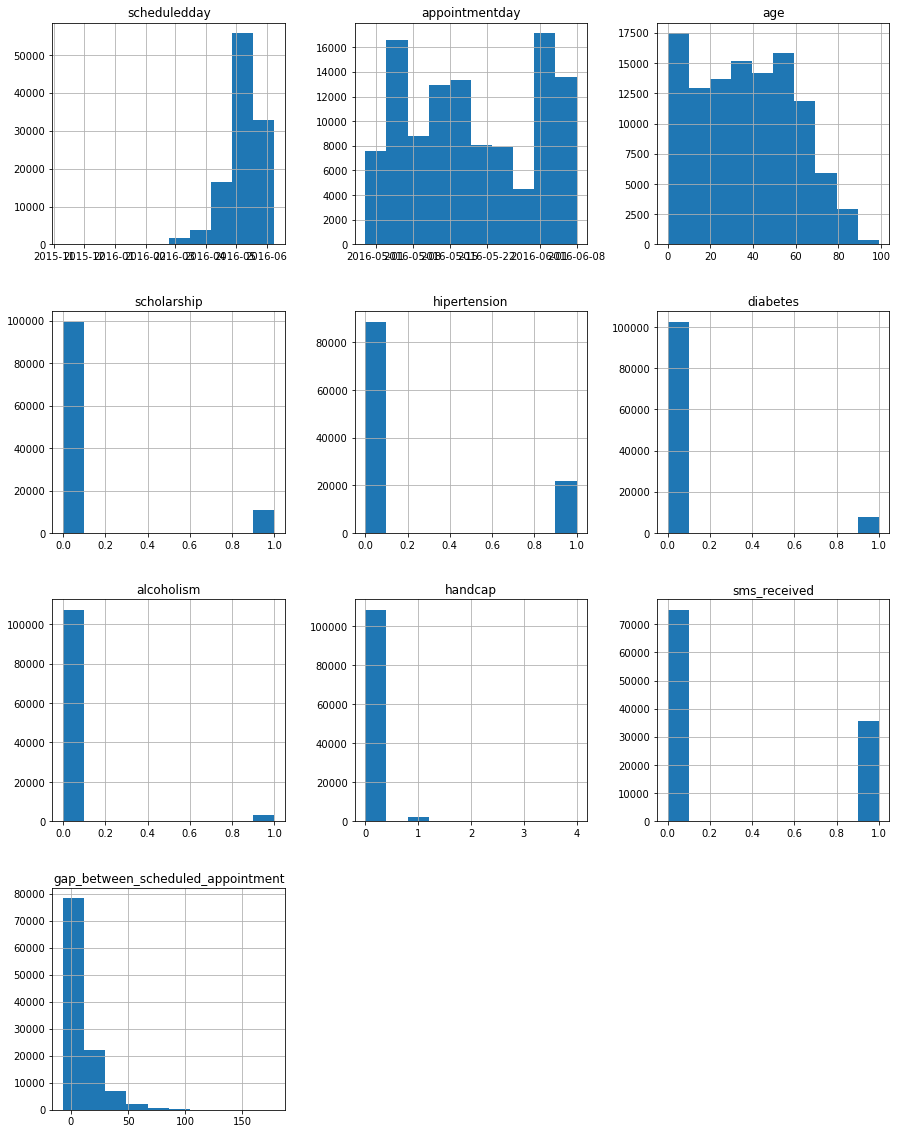

In [18]:
df.hist(figsize=(15,20));

## Age Destribution


The Avr Age of this sample is 37.0822422295616 Year
The Max Age of this sample is 99 Year
The Min Age of this sample is 0 Year


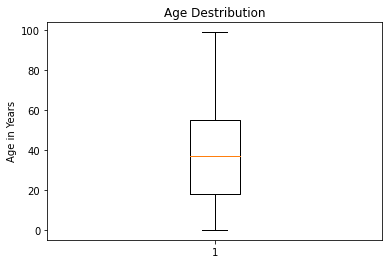

In [19]:
age_mean = df['age'].mean()
age_max = df['age'].max()
age_min=df['age'].min()

print('The Avr Age of this sample is {} Year'.format(age_mean))
print('The Max Age of this sample is {} Year'.format(age_max))
print('The Min Age of this sample is {} Year'.format(age_min))

plt.boxplot(df['age'])
plt.title("Age Destribution");
plt.ylabel('Age in Years');


plt.show()

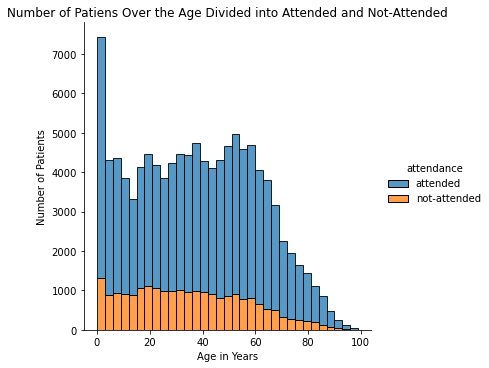

In [20]:
sns.displot(df, x=df['age'], hue=df['attendance'],multiple="stack",binwidth = 3);

plt.title("Number of Patiens Over the Age Divided into Attended and Not-Attended");
plt.xlabel("Age in Years");
plt.ylabel('Number of Patients');

## Scholarship 

In [21]:
def intial_statistics(x):
    total_patient = len(df)
    total_x = len(df.loc[df[x] == 1])
    percent_of_x = total_x/total_patient
    total_x_attended = len(df[(df['attendance']== 'attended')& (df[x]== 1)])
    percent_x_attend = total_x_attended / total_x
    
    print("total number of Patients = {}".format(total_patient))
    print('\n')
    print('total number of Patients in {} = {}'.format(x,total_x))
    print('Percent of {} in the total patients = {:.2%}'.format(x, percent_of_x))
    print('\n')
    print('total number of Patients in {} that attended thier appointment = {}'.format(x,total_x_attended))
    print('Percent of Patients in {} that attended thier appointment = {:.2%}'.format(x,percent_x_attend))
    print('\n')
    

total number of Patients = 110515


total number of Patients in scholarship = 10861
Percent of scholarship in the total patients = 9.83%


total number of Patients in scholarship that attended thier appointment = 8283
Percent of Patients in scholarship that attended thier appointment = 76.26%




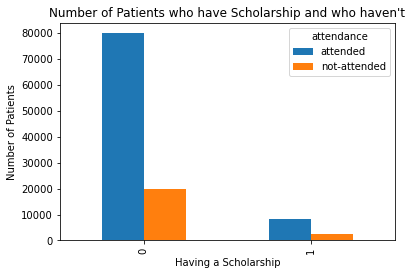

In [22]:
intial_statistics('scholarship')
df.groupby(['scholarship', 'attendance'])['scholarship'].count().unstack('attendance').plot(kind='bar', stacked=False);

plt.title("Number of Patients who have Scholarship and who haven't");
plt.xlabel("Having a Scholarship");
plt.ylabel('Number of Patients');

## Gender

The total number of patients = 110515
Percent of male patinets to the total patients = 35.00%
Percent of female patinets to the total patients = 65.00%
Percent of males that attended thier appointment to the total male paitents = 28.01%
Percent of females that attended thier appointment to the total male paitents = 51.79%




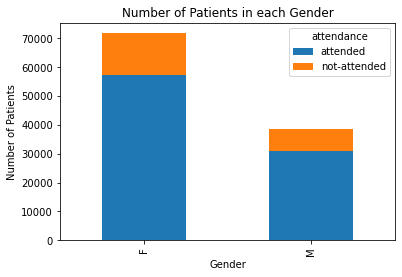

In [23]:
total_patients = len(df)
percent_of_males = len(df[(df['gender']== 'M')])/total_patients
percent_of_females = len(df[(df['gender']== 'F')])/total_patients
percent_of_males_attended = len(df[(df['attendance'] == 'attended')& (df['gender']== 'M')]) / total_patients                            
percent_of_females_attended = len(df[(df['attendance'] == 'attended')& (df['gender']== 'F')])/ total_patients
                            

                            
print("The total number of patients = {}".format(total_patients))
                            
print("Percent of male patinets to the total patients = {:.2%}".format(percent_of_males))
print("Percent of female patinets to the total patients = {:.2%}".format(percent_of_females))

print("Percent of males that attended thier appointment to the total male paitents = {:.2%}".format(percent_of_males_attended))
print("Percent of females that attended thier appointment to the total male paitents = {:.2%}".format(percent_of_females_attended))
print('\n')
df.groupby(['gender', 'attendance'])['gender'].count().unstack('attendance').plot(kind='bar', stacked=True);

plt.title("Number of Patients in each Gender");
plt.xlabel("Gender");
plt.ylabel('Number of Patients');

## Gender and Scholarship


The total male patient is 38685.0
the percent of males that have scholarship in total males is 5.19%


The total female patient is 71830.0
the percent of females that have scholarship in total females is 12.32%




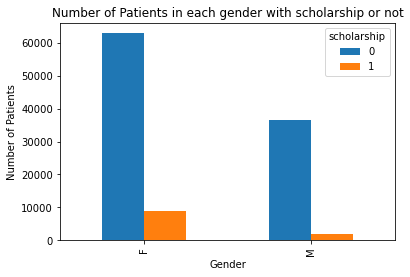

In [24]:
total_males = total_patients * percent_of_males
total_females = total_patients * percent_of_females
total_males_scholarship = len(df[(df['scholarship'] == 1)& (df['gender']== 'M')]) 
total_females_scholarship = len(df[(df['scholarship'] == 1)& (df['gender']== 'F')]) 

percent_of_scholarship_in_males = total_males_scholarship / total_males
percent_of_scholarship_in_females = total_females_scholarship/total_females

print('The total male patient is {}'.format(total_males))
print('the percent of males that have scholarship in total males is {:.2%}'.format(percent_of_scholarship_in_males))
print('\n')
print('The total female patient is {}'.format(total_females))
print('the percent of females that have scholarship in total females is {:.2%}'.format(percent_of_scholarship_in_females))
print('\n')

df.groupby(['gender', 'scholarship'])['gender'].count().unstack('scholarship').plot(kind='bar', stacked=False);

plt.title("Number of Patients in each gender with scholarship or not");
plt.xlabel("Gender");
plt.ylabel('Number of Patients');

## Sending a SMS

total number of Patients = 110515


total number of Patients in sms_received = 35480
Percent of sms_received in the total patients = 32.10%


total number of Patients in sms_received that attended thier appointment = 25696
Percent of Patients in sms_received that attended thier appointment = 72.42%


the percent of paitents that did not recevie a reminder SMS and attended thier appointment =83.30%




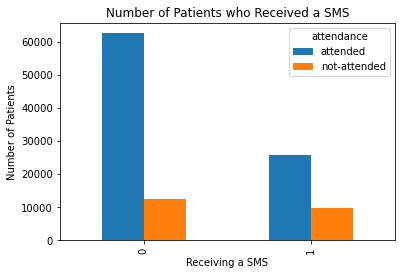

In [25]:
intial_statistics('sms_received')
percent_of_attendance_without_sms = len(df[(df['sms_received'] == 0 ) & (df['attendance']=='attended')]) / len(df[df['sms_received'] == 0] )
print('the percent of paitents that did not recevie a reminder SMS and attended thier appointment ={:.2%}'.format(percent_of_attendance_without_sms))
print('\n')
df.groupby(['sms_received', 'attendance'])['sms_received'].count().unstack('attendance').plot(kind='bar', stacked=False);

plt.title("Number of Patients who Received a SMS");
plt.xlabel("Receiving a SMS");
plt.ylabel('Number of Patients');

## Gap Between Scheduling and Appointment Dates

In [26]:
print('The Avr waiting days between Scheduling and the Appointment day = {:.2}'.format(df['gap_between_scheduled_appointment'].mean()))
print('The Maxmium waiting days between Scheduling and the Appointment day = {}'.format(df['gap_between_scheduled_appointment'].max()))

The Avr waiting days between Scheduling and the Appointment day = 9.2
The Maxmium waiting days between Scheduling and the Appointment day = 178


In [27]:
df['gap_between_scheduled_appointment'].unique()

array([ -1,   1,   2,   0,   3,   8,  28,   9,  22,  10,  17,  16,  13,
        27,  23,  20,  14,  15,  21,  42,  29,  30,  41,  31,  55,  44,
        45,  38,  36,  37,  43,  49,  59,  51,  52,  64,  66,  90,  65,
        83,  77,  86, 114, 108,  62,  69,  71,  56,  57,  50,  58,  40,
        48,  72,  63,  19,  32,  33,   5,  34,  35,  11,  12,  39,  46,
         7,   4,   6,  24,  25,  47,  26,  18,  60,  54,  61, 175,  53,
        76,  68,  82,  75,  88,  80, 102,  78,  67,  74,  84, 111,  -2,
        79,  85,  97,  93, 141, 154, 161, 168, 103, 132, 124,  95,  87,
        89, 150, 125, 126, 110, 118,  73,  70,  81, 107, 109, 101, 121,
       100, 104,  91,  96,  92, 106,  94,  -7, 138, 131, 178, 116, 145,
       122], dtype=int64)

In [28]:
df[df['gap_between_scheduled_appointment']<0].count()

patientid                            38565
appointmentid                        38565
gender                               38565
scheduledday                         38565
appointmentday                       38565
age                                  38565
neighbourhood                        38565
scholarship                          38565
hipertension                         38565
diabetes                             38565
alcoholism                           38565
handcap                              38565
sms_received                         38565
attendance                           38565
gap_between_scheduled_appointment    38565
dtype: int64

Around 38565 patients have thier appointment before the schedule date which unlogical, I thought first it is a typo, but the number of patients represents around 38% of the total record which exculding the posibilty of being a typo. 
this point needs further investigation. 

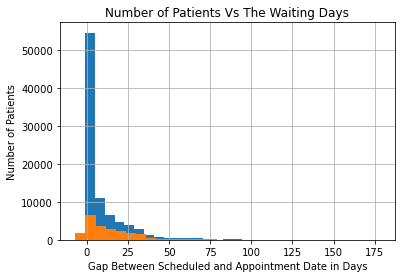

In [29]:
df['gap_between_scheduled_appointment'][df['attendance']=='attended'].hist(alpha=1, bins=30);
df['gap_between_scheduled_appointment'][df['attendance']== 'not-attended'].hist(alpha=1, bins=30);

plt.title("Number of Patients Vs The Waiting Days");
plt.xlabel("Gap Between Scheduled and Appointment Date in Days");
plt.ylabel('Number of Patients');

The shorten awaiting period the more patients show up. Patiens scheduling appointments for the same day are much more likely to show up 

In [30]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295

 <a id='conclusions'></a>
## Conclusions


After exploring the dataset, I made some changes on the column names to make it easy during the analysis process and also renamed some to avoid any misunderstanding. After cleaning the dataset and exclude outliers, a new column has been calculated in order to share more useful insights about our dataset.
The most interesting finding is:
<ul> <li>Regarding the Age:</li>
    <ul><li>The average age of this dataset is 37 years</li>
    <li>Some of these patients are babies less than a year</li>
    <li>The maximum age of this data is 99 years</li></ul> 
	<li>Regarding the Gap between the scheduling date and the appointment date:</li>
<ul><li>The average gap = 9.2 days</li>
	<li>The maximum gap = 178 days which seems a little weird that some one schedule and appointment after more than 5 months.</li>
    <li>The shorten awaiting period the more patients show up. Patiens scheduling appointments for the same day are much more likely to show up </li> </ul>
<li>The effect of having scholarship:</li>
<ul><li>Less than 10% of the patients recorded in this dataset have a scholarship.</li>
<li>Almost there is a very slight difference between the percentage of attendance in patients that have a scholarship and those that haven’t.</li> </ul>
<li>Regarding the Patients’ gender and scholarship:</li>
<ul><li>Males represent 35% of the records and around 28% of them have attended their appointments</li> 
<li>Females represents 65% of the records and around 51% of them have attended their appointments</li>
<li>Females are more likely to attend their appointments </li>
<li>Only 5.1% of Males have a scholarship while Females have 12.3%</li></ul>
<li>Regarding Receiving SMS:</li>
<ul><li>There is almost no difference between the rate of attendance between patients who received a SMS and those who did not.</li></ul>

</ul>

## Limitation: 

<ul>
    <li>After investigating the gap between scheduling and appointment date I found that some of them are in negative value, which means that there is something wrong and need further investigation with the dataset owner. </li>
    
<li>When the gap between scheduling and appointment date is equal to zero it makes sensce that some of patients had booked their appointment on the same day.</li>
<li>The negative values cannot be neglected or dropped as it represents 38565 patients which represents around 38% of the total records </li>
    </ul>
